In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
im_gray = cv.imread('img2.jpg', cv.IMREAD_GRAYSCALE)

# plt.imshow(im_gray, cmap='gray')
# plt.axis('off')
# plt.show()
# print("Image shape:", im_gray.shape)

thresh, im_bw = cv.threshold(im_gray, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
thresh = 80
im_bw = cv.threshold(im_gray, thresh, 255, cv.THRESH_BINARY)[1]

# plt.imshow(im_bw, cmap='gray')
# plt.axis('off')
# plt.show()
print(im_bw.shape)


(2693, 2987)


In [3]:
def decimalToBinary(n):
    return bin(n).replace("0b", "")

# print(decimalToBinary(8))
class Window:
    fitness=0
    def __init__(self,p,q):
        self.p=p
        self.q=q
    def get_size(self):
        print(self.p,self.q)
        
class CAC:
    population=[]
    def __init__(self,population_size,img):
        self.population_size=population_size
        self.img=img
        self.generate_population()
        

    def generate_population(self):
        for _ in range(self.population_size):
            p = random.randint(1, im_bw.shape[0])
            q = random.randint(1, im_bw.shape[1])
            new_window=Window(p, q)
            self.population.append(new_window)
            

    def assign_blocks(self,window):
        print("0")

    def fitness(self,window):
        n1=self.img.shape[0]*self.img[1]
        n2=1
        window.fitness=(n1/n2)
    


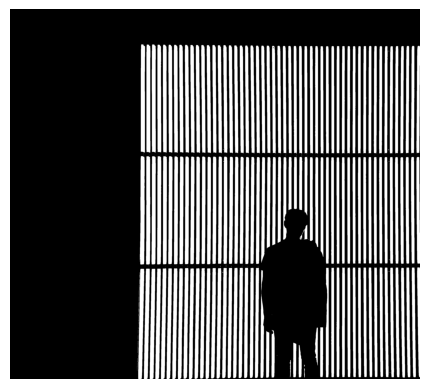

In [4]:
myObj=CAC(10,im_bw)
# for obj in myObj.population:
#     obj.get_size()

for i in range(0,im_bw.shape[1],500):
    for j in range(0,im_bw.shape[0],200):
        print(i,j)
        im_bw[j][i]=255


plt.imshow(im_bw, cmap='gray')
plt.axis('off')
plt.show()